In [7]:
# diabetes_pipeline_final.py
# Minimal, easy-to-remember pipeline with EDA + models (LR, RF, DT, SVM)
CSV_PATH = "diabetes.csv"  # set your path or filename

# --------Step 1: Imports-------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [8]:
# ----------Step 2: Load Data-----------------

df = pd.read_csv(CSV_PATH)
print("✅ Dataset Loaded Successfully")
print(df.head())



✅ Dataset Loaded Successfully
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [9]:
# --- Step 3: Data Cleaning ---
# Replace zero values with NaN for certain columns and fill with mean
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_fix:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].mean(), inplace=True)
print("\n✅ Missing Values Handled Successfully")
print(df.isnull().sum())




✅ Missing Values Handled Successfully
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\saipr\AppData\Local\Temp\ipykernel_52820\3847201019.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [11]:
# --- Step 4: Exploratory Data Analysis (one diagram per concept) ---
sns.set(style="whitegrid")

# 4.1 Descriptive statistics (text)
print("\n--- Descriptive Statistics ---")
print(df.describe().round(3))




--- Descriptive Statistics ---
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  \
count      768.000  768.000        768.000        768.000  768.000  768.000   
mean         3.845  121.687         72.405         29.153  155.548   32.457   
std          3.370   30.436         12.096          8.791   85.021    6.875   
min          0.000   44.000         24.000          7.000   14.000   18.200   
25%          1.000   99.750         64.000         25.000  121.500   27.500   
50%          3.000  117.000         72.203         29.153  155.548   32.400   
75%          6.000  140.250         80.000         32.000  155.548   36.600   
max         17.000  199.000        122.000         99.000  846.000   67.100   

       DiabetesPedigreeFunction      Age  Outcome  
count                   768.000  768.000  768.000  
mean                      0.472   33.241    0.349  
std                       0.331   11.760    0.477  
min                       0.078   21.000    0.00

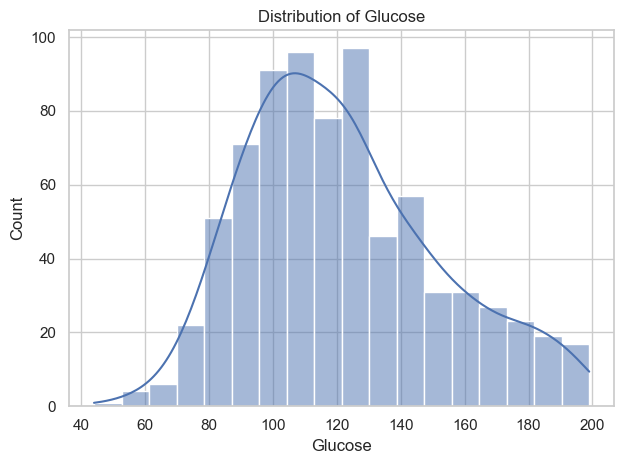

In [12]:
# 4.2 Histogram (Univariate) - Glucose
plt.figure()
sns.histplot(df['Glucose'], kde=True)
plt.title('Distribution of Glucose')
plt.xlabel('Glucose'); plt.ylabel('Count')
plt.tight_layout(); plt.show()



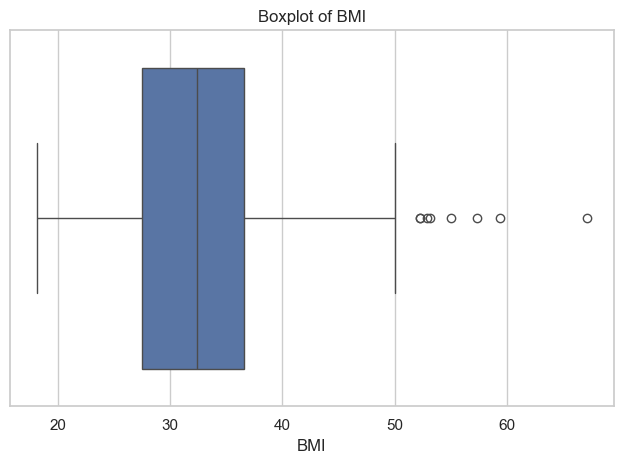

In [13]:
# 4.3 Boxplot (Outlier detection) - BMI
plt.figure()
sns.boxplot(x=df['BMI'])
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.tight_layout(); plt.show()



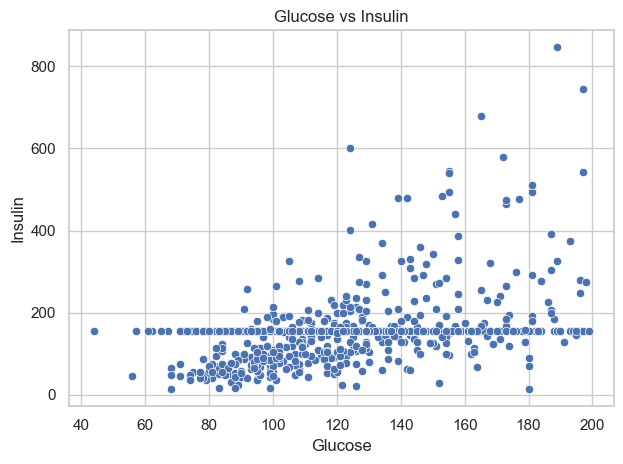

In [14]:
# 4.4 Scatter plot (Bivariate) - Glucose vs Insulin
plt.figure()
sns.scatterplot(x='Glucose', y='Insulin', data=df)
plt.title('Glucose vs Insulin')
plt.xlabel('Glucose'); plt.ylabel('Insulin')
plt.tight_layout(); plt.show()



<Figure size 640x480 with 0 Axes>

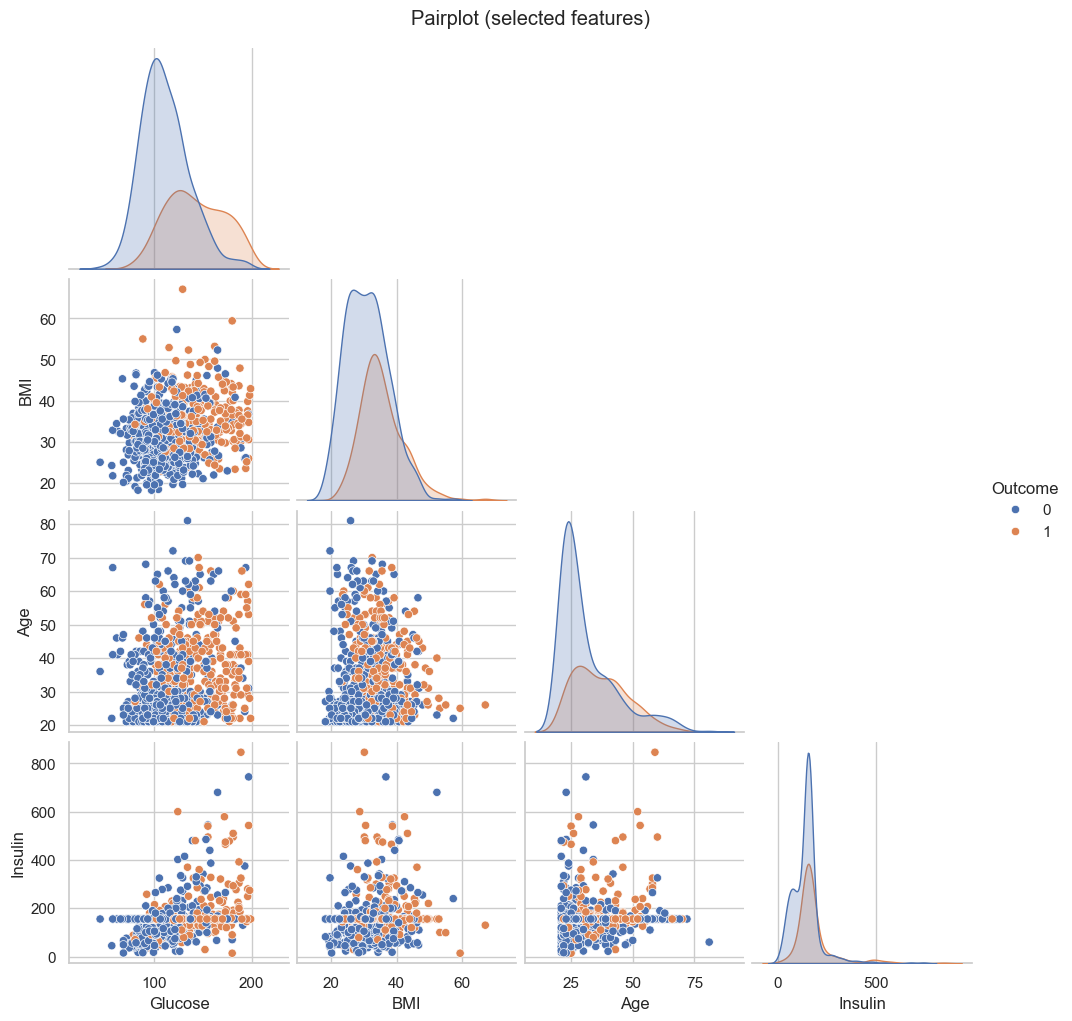

In [15]:
# 4.5 Pairplot (small sample to keep it fast)
# If dataset is large, you can sample: df.sample(200)
plt.figure()
sns.pairplot(df[['Glucose','BMI','Age','Insulin','Outcome']], hue='Outcome', diag_kind='kde', corner=True)
plt.suptitle('Pairplot (selected features)', y=1.02)
plt.show()



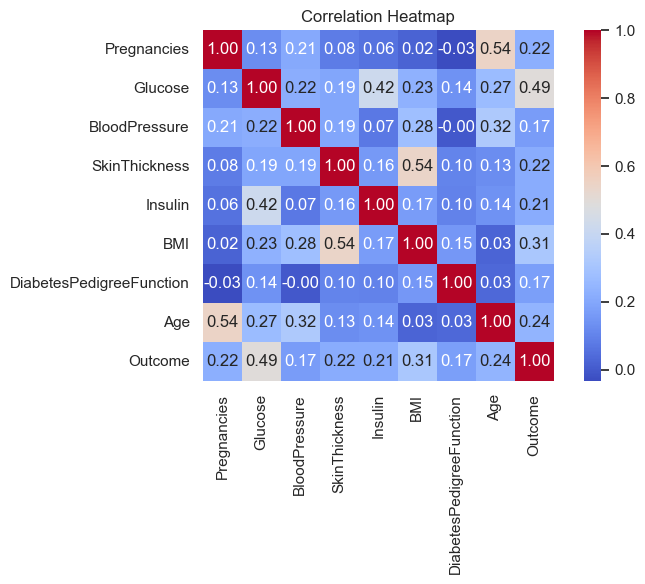

In [16]:
# 4.6 Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.tight_layout(); plt.show()



In [17]:
# --- Step 5: Define Features and Target ---
# drop any Id-like column if present
drop_cols = [c for c in ['Id','id','ID'] if c in df.columns]
X = df.drop(drop_cols + ['Outcome'], axis=1)
y = df['Outcome']



In [18]:
# --- Step 6: Feature Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [19]:
# --- Step 7: Split Data into Train and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



In [20]:
# --- Step 8: Logistic Regression Model ---
lr = LogisticRegression(random_state=42, max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)



In [21]:
# --- Step 9: Random Forest Model ---
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)



In [22]:
# --- Step 10: Decision Tree Model (included) ---
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)



In [23]:
# --- Step 11: Support Vector Machine (included) ---
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)



In [24]:
# --- Step 12: Evaluate Models ---
print("\n--- Logistic Regression Results ---")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr), 3))
print(classification_report(y_test, y_pred_lr))

print("\n--- Random Forest Results ---")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print(classification_report(y_test, y_pred_rf))

print("\n--- Decision Tree Results ---")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt), 3))
print(classification_report(y_test, y_pred_dt))

print("\n--- SVM Results ---")
print("Accuracy:", round(accuracy_score(y_test, y_pred_svm), 3))
print(classification_report(y_test, y_pred_svm))




--- Logistic Regression Results ---
Accuracy: 0.695
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154


--- Random Forest Results ---
Accuracy: 0.786
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154


--- Decision Tree Results ---
Accuracy: 0.792
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       100
           1       0.68      0.78      0.72        54

    accuracy                       

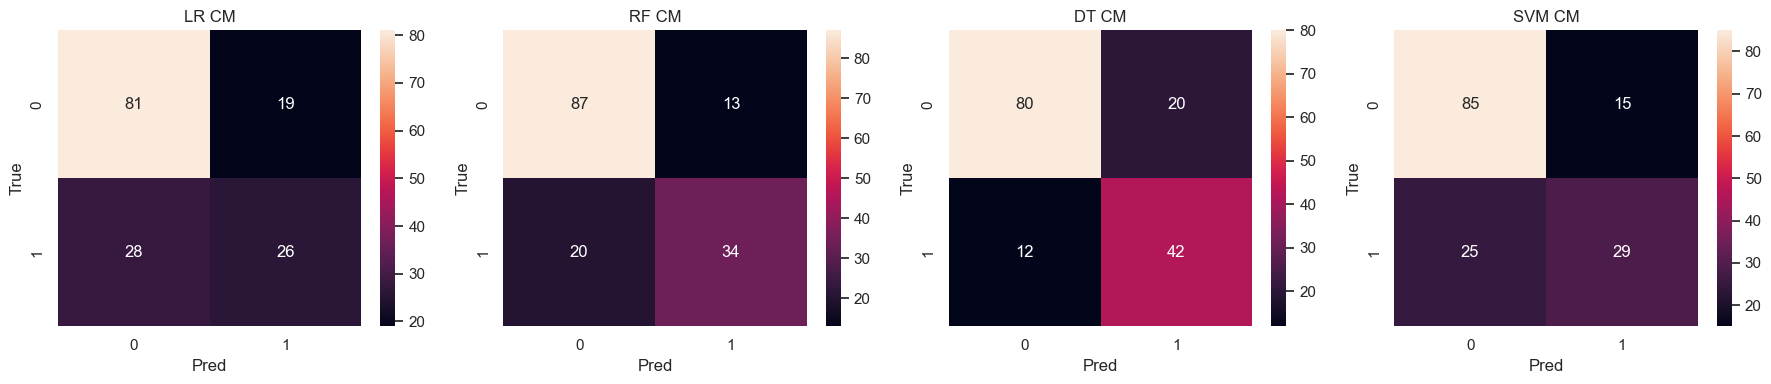

In [25]:
# Confusion matrices (compact)
fig, axes = plt.subplots(1, 4, figsize=(18,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=axes[0]); axes[0].set_title('LR CM')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=axes[1]); axes[1].set_title('RF CM')
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=axes[2]); axes[2].set_title('DT CM')
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', ax=axes[3]); axes[3].set_title('SVM CM')
for ax in axes: ax.set_xlabel('Pred'); ax.set_ylabel('True')
plt.tight_layout(); plt.show()



In [26]:
# Feature importance for Random Forest (risk factor)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\n--- Risk Factor Importance (Random Forest) ---")
print(feature_importance.head())




--- Risk Factor Importance (Random Forest) ---
                    Feature  Importance
1                   Glucose    0.272513
5                       BMI    0.167201
6  DiabetesPedigreeFunction    0.120298
7                       Age    0.112406
4                   Insulin    0.092084


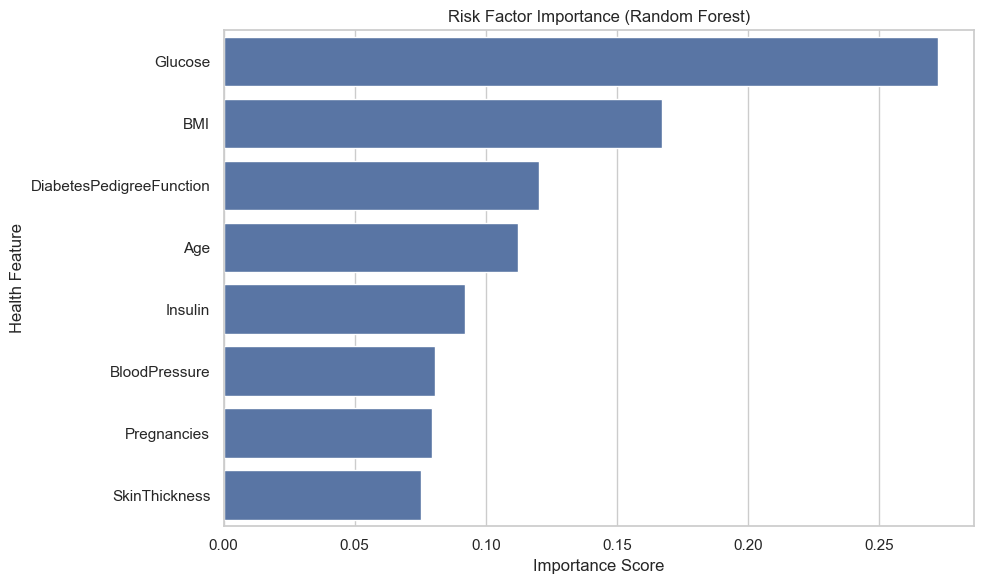

In [27]:
# Visualize RF importances
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Risk Factor Importance (Random Forest)')
plt.xlabel('Importance Score'); plt.ylabel('Health Feature')
plt.tight_layout(); plt.show()



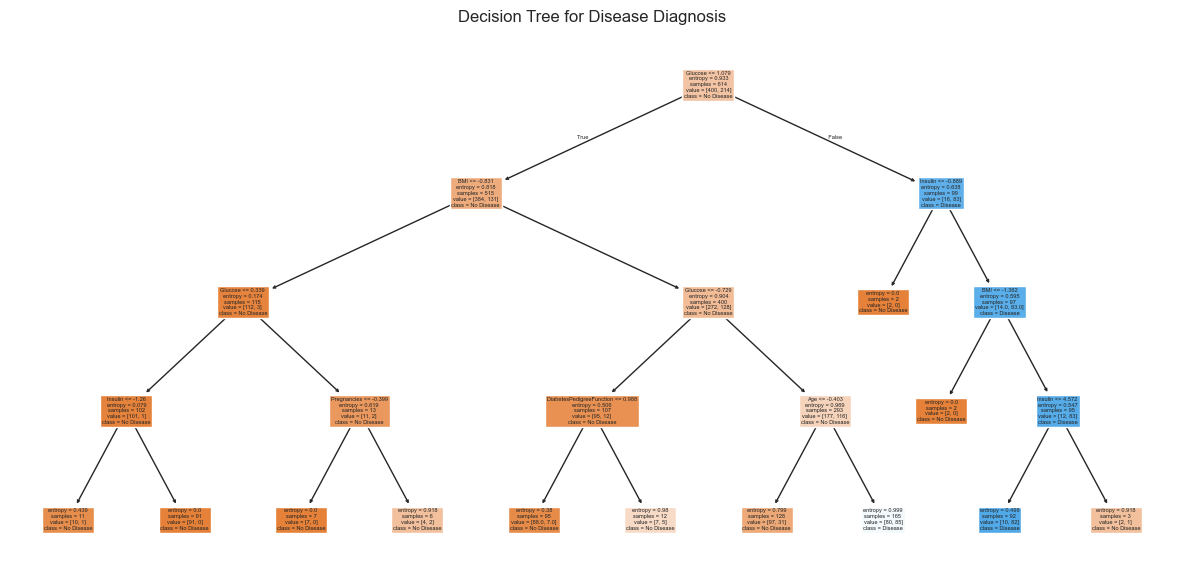

In [28]:
# Visualize Decision Tree
plt.figure(figsize=(12,6))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease","Disease"], filled=True)
plt.title("Decision Tree for Disease Diagnosis")
plt.tight_layout(); plt.show()



In [29]:
# Example prediction on new patient (must match feature order)
new_patient = np.array([[2,150,80,25,100,30.5,0.45,35]])  # adjust if columns differ
try:
    new_patient_scaled = scaler.transform(new_patient)
    prediction = svm.predict(new_patient_scaled)
    print("\nNew Patient Prediction (SVM):", "Disease" if prediction[0]==1 else "No Disease")
except Exception as e:
    print("\nSkip new patient prediction: adjust new_patient shape to match features. Error:", e)



New Patient Prediction (SVM): Disease


C:\Users\saipr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
